In [11]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../../")

import QuantLib as ql
import pandas as pd
import numpy as np
from datetime import datet
from io import StringIO

from ron.QuantLib.YieldCurve_Multi import PiecewiseCurveBuilder, Convert

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
market_data = StringIO("""
Ticker,Value
SOFR.FIXINGD.2020-06-23,0.0007
SOFR.FIXINGD.2020-06-24,0.0008
SOFR.FIXINGD.2020-06-25,0.0009
SOFR.FIXINGD.2020-06-26,0.0008
SOFR.FIXINGD.2020-06-29,0.0008
SOFR.FIXINGD.2020-06-30,0.0010
SOFR.FIXINGD.2020-07-01,0.0011
SOFR.FIXINGD.2020-07-02,0.0011
SOFR.SOFRFUTURE.07.2020.Monthly.Averaging, 99.9075
SOFR.SOFRFUTURE.08.2020.Monthly.Averaging, 99.915
SOFR.SOFRFUTURE.09.2020.Monthly.Averaging, 99.92
SOFR.SOFRFUTURE.10.2020.Monthly.Averaging, 99.935
SOFR.SOFRFUTURE.11.2020.Monthly.Averaging, 99.94
SOFR.SOFRFUTURE.12.2020.Monthly.Averaging, 99.935
SOFR.SOFRFUTURE.01.2021.Monthly.Averaging, 99.945
SOFR.SOFRFUTURE.12.2020.Quarterly.Compounding, 99.96
SOFR.SOFRFUTURE.03.2021.Quarterly.Compounding, 99.985
SOFR.SOFRFUTURE.06.2021.Quarterly.Compounding, 100.005
SOFR.SOFRFUTURE.09.2021.Quarterly.Compounding, 100.015
SOFR.SOFRFUTURE.12.2021.Quarterly.Compounding, 100.02
SOFR.SOFRFUTURE.03.2022.Quarterly.Compounding, 100.025
USD.DEPOSIT.1D,0.02359
USD.DEPOSIT.1W,0.0237475
USD.DEPOSIT.1M,0.02325
USD.DEPOSIT.2M,0.0232475
USD.DEPOSIT.3M,0.0230338
USD.FUTURE.2M,97.92
USD.FUTURE.5M,98.005
USD.FUTURE.8M,98.185
USD.FUTURE.11M,98.27
USD.FUTURE.14M,98.33
USD.SWAP.2Y,0.01879
USD.SWAP.3Y,0.01835
USD.SWAP.5Y,0.01862
USD.SWAP.7Y,0.0194
USD.SWAP.10Y,0.02065
USD.SWAP.15Y,0.02204
USD.SWAP.30Y,0.02306
EUR.DEPOSIT.1D,-0.00366
EUR.DEPOSIT.1W,-0.00399
EUR.DEPOSIT.1M,-0.00393
EUR.DEPOSIT.3M,-0.00363
EUR.DEPOSIT.6M,-0.00342
EUR.FUTURE.5M,100.48
EUR.FUTURE.8M,100.505
EUR.FUTURE.11M,100.505
EUR.FUTURE.14M,100.495
EUR.FUTURE.17M,100.47
EUR.SWAP.1Y,-0.0038
EUR.SWAP.2Y,-0.0039
EUR.SWAP.5Y,-0.0019
EUR.SWAP.7Y,-0.0002
EUR.SWAP.10Y,0.0024
EUR.SWAP.15Y,0.0056
EUR.SWAP.30Y,0.008
""")

In [13]:
conventions = {
  "SOFR": {
    "CONFIGURATIONS": {
      "DAYCOUNTER": "Actual365Fixed"
    },
    "DEPOSIT": {
      "FIXINGDAYS": 0,
      "CALENDAR": "TARGET",
      "BUSINESSDAYCONVENTION": "MODIFIEDFOLLOWING",
      "ENDOFMONTH": True,
      "DAYCOUNTER": "ACTUAL360"
    },
    "OIS": {
      "SETTLEMENTDAYS": 2
    },
  },
  "EONIA": {
    "CONFIGURATIONS": {
      "DAYCOUNTER": "ACTUAL360"
    },
    "DEPOSIT": {
      "FIXINGDAYS": 0,
      "CALENDAR": "TARGET",
      "BUSINESSDAYCONVENTION": "MODIFIEDFOLLOWING",
      "ENDOFMONTH": True,
      "DAYCOUNTER": "ACTUAL360"
    },
    "OIS": {
      "SETTLEMENTDAYS": 2
    },
  },
  "USD": {
    "CONFIGURATIONS": {
      "DAYCOUNTER": "ACTUAL360"
    },
    "DEPOSIT": {
      "FIXINGDAYS": 0,
      "CALENDAR": "TARGET",
      "BUSINESSDAYCONVENTION": "MODIFIEDFOLLOWING",
      "ENDOFMONTH": False,
      "DAYCOUNTER": "ACTUAL360"
    },
    "FUTURE": {
      "LENGTHINMONTHS": 3,
      "CALENDAR": "TARGET",
      "BUSINESSDAYCONVENTION": "MODIFIEDFOLLOWING",
      "ENDOFMONTH": False,
      "DAYCOUNTER": "ACTUAL360"
    },
    "SWAP": {
      "FIXEDCALENDAR": "TARGET",
      "FIXEDFREQUENCY": "ANNUAL",
      "FIXEDCONVENTION": "MODIFIEDFOLLOWING",
      "FIXEDDAYCOUNTER": "ACTUAL360",
      "FLOATINDEX": "USD.3M"
    }
  },
  "EUR": {
    "CONFIGURATIONS": {
      "DAYCOUNTER": "ACTUAL360"
    },
    "DEPOSIT": {
      "FIXINGDAYS": 0,
      "CALENDAR": "TARGET",
      "BUSINESSDAYCONVENTION": "MODIFIEDFOLLOWING",
      "ENDOFMONTH": False,
      "DAYCOUNTER": "ACTUAL360"
    },
    "FUTURE": {
      "LENGTHINMONTHS": 6,
      "CALENDAR": "TARGET",
      "BUSINESSDAYCONVENTION": "MODIFIEDFOLLOWING",
      "ENDOFMONTH": False,
      "DAYCOUNTER": "ACTUAL360"
    },
    "SWAP": {
      "FIXEDCALENDAR": "TARGET",
      "FIXEDFREQUENCY": "ANNUAL",
      "FIXEDCONVENTION": "MODIFIEDFOLLOWING",
      "FIXEDDAYCOUNTER": "ACTUAL360",
      "FLOATINDEX": "EUR.6M"
    }
  }
}

In [14]:
marketData = pd.read_csv(market_data, sep=",", skipinitialspace=True)

evaluationDate = Convert.to_date(datetime.today().strftime("%Y-%m-%d"))

ql.Settings.instance().evaluationDate = evaluationDate
builder = PiecewiseCurveBuilder(evaluationDate, conventions, marketData)


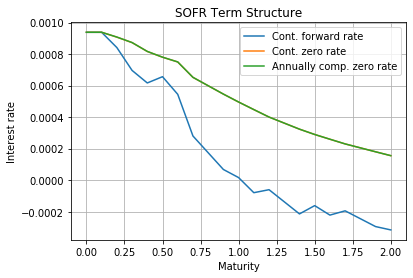

In [15]:
curveType="SOFR"
discountCurve = builder.Build(curveType)
builder.plot(curveType,years=2)


In [16]:
builder.data(curveType)

,Ticker,Value,Quote,Curve Implied Quote,Rate,Discount Factor,Forward Rate,Annual ZeroRate,Continuous ZeroRate,Maturity,Pillar,Fraction
0,SOFR.FIXINGD.2020-06-23,0.0007,,,,,,,,,,
1,SOFR.FIXINGD.2020-06-24,0.0008,,,,,,,,,,
2,SOFR.FIXINGD.2020-06-25,0.0009,,,,,,,,,,
3,SOFR.FIXINGD.2020-06-26,0.0008,,,,,,,,,,
4,SOFR.FIXINGD.2020-06-29,0.0008,,,,,,,,,,
5,SOFR.FIXINGD.2020-06-30,0.0010,,,,,,,,,,
6,SOFR.FIXINGD.2020-07-01,0.0011,,,,,,,,,,
7,SOFR.FIXINGD.2020-07-02,0.0011,,,,,,,,,,
8,SOFR.SOFRFUTURE.07.2020.Monthly.Averaging,99.9075,99.9075,99.9075,0.0925,0.999887,0.0009146,0.000938285,0.000937845,2020-08-19,2020-08-19,0.120548
9,SOFR.SOFRFUTURE.08.2020.Monthly.Averaging,99.9150,99.915,99.915,0.085,0.999821,0.000837563,0.000908686,0.000908273,2020-09-16,2020-09-16,0.19726


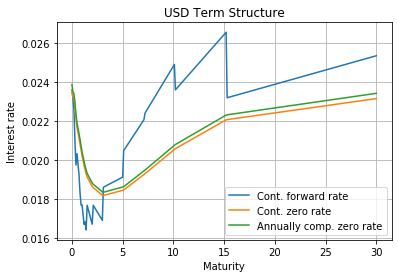

In [17]:
curveType="USD"
curve = builder.Build(curveType)
builder.plot(curveType)

In [18]:
builder.data(curveType)

,Ticker,Value,Quote,Curve Implied Quote,Rate,Discount Factor,Forward Rate,Annual ZeroRate,Continuous ZeroRate,Maturity,Pillar,Fraction
21,USD.DEPOSIT.1D,0.023590,0.023590,0.023590,,0.999934,0.023602,0.023870,0.023589,2020-07-07,2020-07-07,0.002778
22,USD.DEPOSIT.1W,0.023747,0.023747,0.023748,,0.999538,0.023756,0.024026,0.023742,2020-07-13,2020-07-13,0.019444
23,USD.DEPOSIT.1M,0.023250,0.023250,0.023250,,0.998002,0.022881,0.023499,0.023227,2020-08-06,2020-08-06,0.086111
24,USD.DEPOSIT.2M,0.023248,0.023248,0.023247,,0.995948,0.022920,0.023472,0.023200,2020-09-07,2020-09-07,0.175000
25,USD.DEPOSIT.3M,0.023034,0.023034,0.023034,,0.994148,0.021838,0.023232,0.022966,2020-10-06,2020-10-06,0.255556
26,USD.FUTURE.2M,97.920000,97.920000,97.920000,,0.990179,0.019845,0.022037,0.021798,2020-12-16,2020-12-16,0.452778
27,USD.FUTURE.5M,98.005000,98.005000,98.005000,,0.985265,0.019075,0.021347,0.021123,2021-03-16,2021-03-16,0.702778
28,USD.FUTURE.8M,98.185000,98.185000,98.185000,,0.980665,0.017603,0.020523,0.020315,2021-06-17,2021-06-17,0.961111
29,USD.FUTURE.11M,98.270000,98.270000,98.270000,,0.976395,0.016903,0.019874,0.019679,2021-09-16,2021-09-16,1.213889
30,USD.FUTURE.14M,98.330000,98.330000,98.330000,,0.972336,0.016948,0.019349,0.019164,2021-12-15,2021-12-15,1.463889


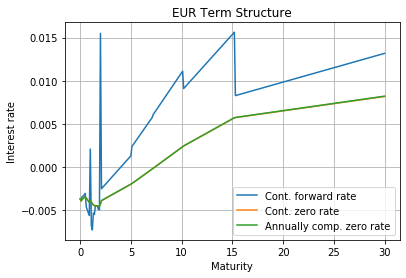

In [19]:
curveType="EUR"
curve = builder.Build(curveType)
builder.plot(curveType)

In [20]:
builder.data(curveType)

,Ticker,Value,Quote,Curve Implied Quote,Rate,Discount Factor,Forward Rate,Annual ZeroRate,Continuous ZeroRate,Maturity,Pillar,Fraction
38,EUR.DEPOSIT.1D,-0.00366,-0.00366,-0.00366,,1.000010,-0.003688,-0.003653,-0.003660,2020-07-07,2020-07-07,0.002778
39,EUR.DEPOSIT.1W,-0.00399,-0.00399,-0.00399,,1.000078,-0.004174,-0.003982,-0.003990,2020-07-13,2020-07-13,0.019444
40,EUR.DEPOSIT.1M,-0.00393,-0.00393,-0.00393,,1.000339,-0.003816,-0.003923,-0.003931,2020-08-06,2020-08-06,0.086111
41,EUR.DEPOSIT.3M,-0.00363,-0.00363,-0.00363,,1.000929,-0.003302,-0.003625,-0.003632,2020-10-06,2020-10-06,0.255556
42,EUR.DEPOSIT.6M,-0.00342,-0.00342,-0.00342,,1.001751,-0.003644,-0.003417,-0.003423,2021-01-06,2021-01-06,0.511111
43,EUR.FUTURE.5M,100.48000,100.48000,100.48000,,1.004009,-0.002094,-0.004166,-0.004175,2021-06-16,2021-06-16,0.958333
44,EUR.FUTURE.8M,100.50500,100.50500,100.50500,,1.005244,-0.006258,-0.004290,-0.004299,2021-09-17,2021-09-17,1.216667
45,EUR.FUTURE.11M,100.50500,100.50500,100.50500,,1.006593,-0.005017,-0.004470,-0.004481,2021-12-16,2021-12-16,1.466667
46,EUR.FUTURE.14M,100.49500,100.49500,100.49500,,1.007711,-0.004671,-0.004472,-0.004482,2022-03-15,2022-03-15,1.713889
47,EUR.FUTURE.17M,100.47000,100.47000,100.47000,,1.008975,0.004959,-0.004527,-0.004537,2022-06-15,2022-06-15,1.969444
